<a href="https://colab.research.google.com/github/SaraEsamMohamed/ClassifyImages/blob/master/ClassifyImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#program to classifies images

In [ ]:
#load the data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#get the shapes
print('x_train shape:' ,x_train.shape)
print('y_train shape:' ,y_train.shape)
print('x_test shape:' ,x_test.shape)
print('x_test shape:' ,x_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [ ]:
#first image at training set at index=0
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

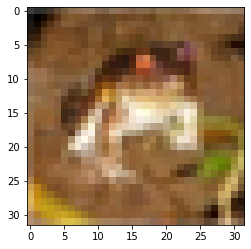

In [ ]:
#show image as picture
import matplotlib.pyplot as plt
img =plt.imshow(x_train[0])

In [ ]:
#print the label of the image 
print('the label is:' ,y_train[0])

the label is: [6]


In [ ]:
#One Hot-Encoding: convert the lable into set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot  = to_categorical(y_test)

#print the new labels in the training datasets 
print(y_train_one_hot)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print an example of new labels
print('the one hot label is:',y_train_one_hot[0])

the one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize the pixels in the images to be values between 0 & 1
x_train = x_train/255
x_test = x_test/255


In [ ]:
#Build CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten ,Conv2D ,MaxPooling2D 

#create the architecture 
model =Sequential()

#Convolution layer
model.add( Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)) )

#maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolution layer
model.add( Conv2D(32,(5,5),activation='relu') )

#maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten layer
model.add(Flatten() )

model.add( Dense (1000,activation='relu'))
model.add( Dense (10,activation='softmax'))


In [ ]:
#compile the model 
model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])

In [ ]:
#train the model
hist = model.fit(x_train ,y_train_one_hot ,batch_size=256 ,epochs=10 ,validation_split=0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 52s 1ms/step - loss: 1.7698 - acc: 0.3573 - val_loss: 1.5401 - val_acc: 0.4383
Epoch 2/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.4350 - acc: 0.4846 - val_loss: 1.3959 - val_acc: 0.4966
Epoch 3/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.3127 - acc: 0.5321 - val_loss: 1.2724 - val_acc: 0.5529
Epoch 4/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.1993 - acc: 0.5758 - val_loss: 1.2609 - val_acc: 0.5666
Epoch 5/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.1052 - acc: 0.6113 - val_loss: 1.1856 - val_acc: 0.5885
Epoch 6/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.0386 - acc: 0.6361 - val_loss: 1.1182 - val_acc: 0.6092
Epoch 7/10
35000/35000 [==

In [ ]:
#Get the models accuracy
model.evaluate(x_test ,y_test_one_hot)[1]

10000/10000 [==============================] - 5s 549us/step


0.6517

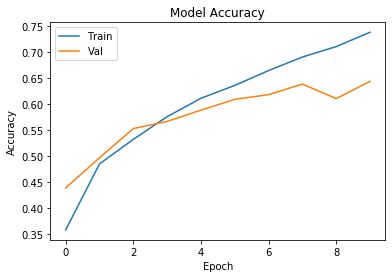

In [ ]:
#visualize the models accuracy 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'] ,loc='upper left')
plt.show()

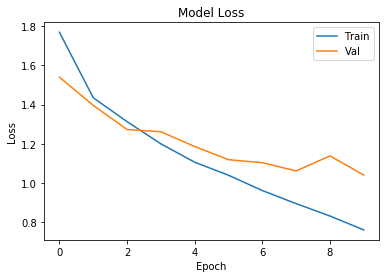

In [ ]:
#visualize the models loss 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'] ,loc='upper right')
plt.show()

In [ ]:
#Load the data
from google.colab import files
uploaded =files.upload()
my_image=plt.imread('cat.jpg')

Saving cat.jpg to cat.jpg


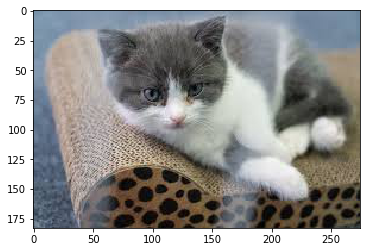

In [ ]:
#show the uploaded image
img = plt.imshow(my_image)

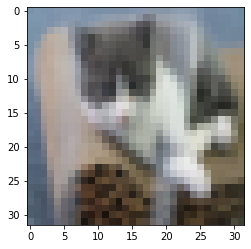

In [ ]:
#Resize the image 
from skimage.transform import resize
my_image_resized = resize(my_image ,(32,32,3))
img = plt.imshow(my_image_resized)

In [ ]:
#Get the probabilities for each class 
import numpy as np
probabilities = model.predict( np.array( [my_image_resized,] ))

#print the probabilities 
probabilities


array([[0.15408942, 0.00459801, 0.05723339, 0.30766627, 0.00386337,
        0.15735224, 0.00102525, 0.07436989, 0.130012  , 0.10979012]],
      dtype=float32)

In [ ]:
number_to_class = ['airplane','automobile','bird','cat' ,'deer' ,'dog' ,'frog','horse' ,'ship' ,'truck']
index = np.argsort(probabilities[0,:])
print('Most likely Class:' ,number_to_class[index[9]],'---probability:',probabilities[0,index[9]])
print('Second Most likely Class:' ,number_to_class[index[8]],'---probability:',probabilities[0,index[8]])
print('Third most likely Class:' ,number_to_class[index[7]],'---probability:',probabilities[0,index[7]])
print('Fourth most likely Class:' ,number_to_class[index[6]],'---probability:',probabilities[0,index[6]])
print('Fifth most likely Class:' ,number_to_class[index[5]],'---probability:',probabilities[0,index[5]])


Most likely Class: cat ---probability: 0.30766627
Second Most likely Class: dog ---probability: 0.15735224
Third most likely Class: airplane ---probability: 0.15408942
Fourth most likely Class: ship ---probability: 0.130012
Fifth most likely Class: truck ---probability: 0.109790124


In [ ]:
#Save the model
model.save('my_model.h5')

In [ ]:
#load the model
from keras.models import load_model
model = load_model('my_model.h5')